<a href="https://colab.research.google.com/github/zahra-teb/graph_ml_course_assignments/blob/main/assignment_7/assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dgl -f https://data.dgl.ai/wheels/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 41.3 MB/s eta 0:00:00


In [2]:
!pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... don

In [3]:
%matplotlib inline
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import numpy as np
import networkx as nx
import torch
import torch.nn as nn

**Let's create the following heterograph:**

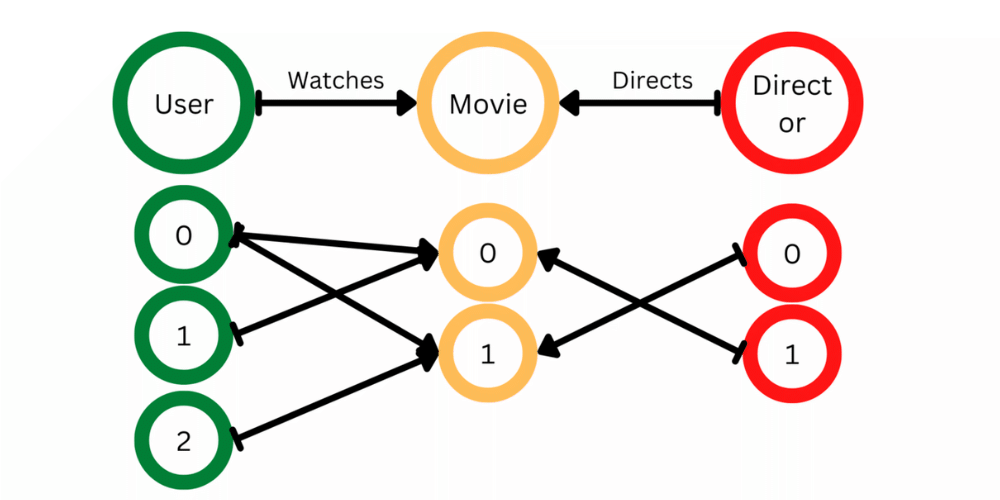

In [4]:
# Create a heterograph

data_dict = {
    ('user', 'watches', 'movie'): (torch.tensor([0, 0, 1, 2]),
                                   torch.tensor([0, 1, 0, 1])),
    ('director', 'directs', 'movie'): (torch.tensor([0, 1]),
                                       torch.tensor([1, 0]))
}
g = dgl.heterograph(data_dict)
g

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

In [5]:
g.ntypes

['director', 'movie', 'user']

In [6]:
g.etypes

['directs', 'watches']

**Querying graph structure**

In [7]:
g.num_nodes()

7

In [8]:
g.num_nodes('user')

3

In [9]:
g.num_edges()

6

In [10]:
g.num_edges('directs')

2

In [11]:
g.num_edges('watches')

4

In [12]:
g.num_src_nodes()

5

In [13]:
g.num_src_nodes('user')

3

In [14]:
g.num_src_nodes('director')

2

In [15]:
g.num_dst_nodes()

2

In [16]:
g.num_dst_nodes('movie')

2

Makes senese! Cause the only type in graph which containing nodes are destination is 'movie'.

In [17]:
g.is_unibipartite

True

In [18]:
g.is_multigraph

False

In [19]:
g.is_homogeneous

False

In [20]:
g.has_nodes(0, 'user')

True

In [21]:
g.has_nodes(3, 'user')

False

In [22]:
g.has_nodes([1, 2, 3], 'user')

tensor([ True,  True, False])

In [23]:
g.has_edges_between(0, 1, 'directs')

True

In [24]:
g.has_edges_between(1, 1, 'watches')

False

In [25]:
g.predecessors(0, 'watches')

tensor([0, 1])

In [26]:
g.predecessors(1, 'watches')

tensor([0, 2])

In [27]:
g.predecessors(1, 'directs')

tensor([0])

In [28]:
g.successors(0, 'watches')

tensor([0, 1])

In [29]:
g.successors(2, 'watches')

tensor([1])

In [30]:
g.successors(1, 'directs')

tensor([0])

In [31]:
g.edge_ids(0, 1, etype='watches')

1

In [32]:
g.edge_ids([1, 2], [0, 1], etype='watches')

tensor([2, 3])

In [33]:
g.find_edges(2, 'watches')

(tensor([1]), tensor([0]))

In [34]:
g.in_edges(0, etype='watches')

(tensor([0, 1]), tensor([0, 0]))

In [35]:
g.in_edges(1, etype='watches')

(tensor([0, 2]), tensor([1, 1]))

In [36]:
g.out_edges(0, etype='watches')

(tensor([0, 0]), tensor([0, 1]))

In [37]:
g.out_edges(1, etype='directs')

(tensor([1]), tensor([0]))

In [38]:
g.in_degrees(0, 'watches')

2

In [39]:
g.in_degrees(0, 'directs')

1

In [40]:
g.in_degrees(1, 'watches')

2

In [41]:
g.out_degrees(0, 'watches')

2

In [42]:
g.out_degrees(1, 'directs')

1

**Querying and manipulating node/edge ID type**

In [43]:
g.idtype

torch.int64

In [44]:
g.long()

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

In [45]:
g.int()

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

**Using Node/edge features**

In [46]:
g.nodes('director')

tensor([0, 1])

In [47]:
g.nodes('movie')

tensor([0, 1])

In [48]:
g.nodes('user')

tensor([0, 1, 2])

In [49]:
g.ndata

defaultdict(<class 'dict'>, {})

In [50]:
g.ndata['nfeature_1'] = {'director': torch.randn(2, 3), 'movie': torch.randn(2, 2), 'user': torch.ones(3, 4)}

In [51]:
g.ndata['nfeature_1']

{'director': tensor([[ 0.2049, -0.0089, -0.2208],
         [-0.4123, -1.2733, -0.0142]]),
 'movie': tensor([[-1.0324, -0.3305],
         [-1.2610, -0.4404]]),
 'user': tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]])}

In [52]:
g.ndata['nfeature_1']['movie']

tensor([[-1.0324, -0.3305],
        [-1.2610, -0.4404]])

In [53]:
g.ndata['nfeature_1']['user']

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [54]:
g.edges(etype='watches')

(tensor([0, 0, 1, 2]), tensor([0, 1, 0, 1]))

In [55]:
g.edges(etype='directs')

(tensor([0, 1]), tensor([1, 0]))

In [56]:
g.edata

defaultdict(<class 'dict'>, {})

In [57]:
g.edata['efeature_1'] = {'watches': torch.randn(4, 2), 'directs': torch.zeros(2, 1)}

In [58]:
g.edata['efeature_1']

{('director',
  'directs',
  'movie'): tensor([[0.],
         [0.]]),
 ('user',
  'watches',
  'movie'): tensor([[-1.0950,  0.7338],
         [ 1.0889, -0.3820],
         [ 0.9242, -0.0361],
         [-1.2228,  0.7295]])}

In [59]:
g.edata['efeature_1'][('director', 'directs', 'movie')]

tensor([[0.],
        [0.]])

In [60]:
g.edges['directs'].data['efeature_2'] = torch.ones(2, 2) # set feature 'efeature_2' for edges of type 'directs'
g.edata['efeature_2'] # get feature 'efeature_2'

{('director',
  'directs',
  'movie'): tensor([[1., 1.],
         [1., 1.]])}

In [61]:
g.node_attr_schemes('user')

{'nfeature_1': Scheme(shape=(4,), dtype=torch.float32)}

In [62]:
g.node_attr_schemes('movie')

{'nfeature_1': Scheme(shape=(2,), dtype=torch.float32)}

In [63]:
g.node_attr_schemes('director')

{'nfeature_1': Scheme(shape=(3,), dtype=torch.float32)}

In [64]:
g.edge_attr_schemes('watches')

{'efeature_1': Scheme(shape=(2,), dtype=torch.float32)}

In [65]:
g.edge_attr_schemes('directs')

{'efeature_1': Scheme(shape=(1,), dtype=torch.float32),
 'efeature_2': Scheme(shape=(2,), dtype=torch.float32)}

In [66]:
g.srcnodes('user')

tensor([0, 1, 2])

In [67]:
g.dstnodes('movie')

tensor([0, 1])

In [68]:
dict(g.srcdata)

{'nfeature_1': {'director': tensor([[ 0.2049, -0.0089, -0.2208],
          [-0.4123, -1.2733, -0.0142]]),
  'user': tensor([[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]])}}

In [69]:
dict(g.dstdata)

{'nfeature_1': tensor([[-1.0324, -0.3305],
         [-1.2610, -0.4404]])}

**Subgraph Extraction Ops and Transforming graph**

In [70]:
h = dgl.graph((torch.tensor([2, 3, 3, 4, 2, 3]), torch.tensor([1, 2, 0, 3, 2, 1])))
h 

Graph(num_nodes=5, num_edges=6,
      ndata_schemes={}
      edata_schemes={})

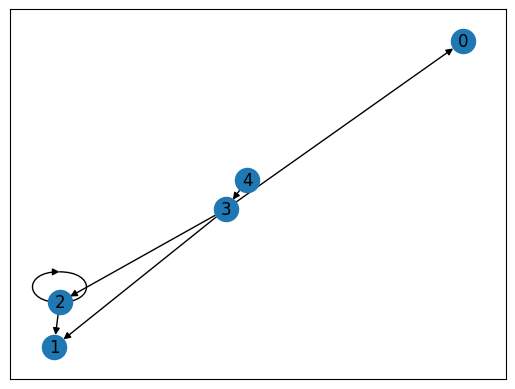

In [71]:
nx.draw_networkx(h.to_networkx(), with_labels = True)

In [72]:
sub_h_1 = dgl.node_subgraph(h, [0, 3, 2])
# or:
# sub_h_1 = h.subgraph([0, 3, 2])
sub_h_1

Graph(num_nodes=3, num_edges=3,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})

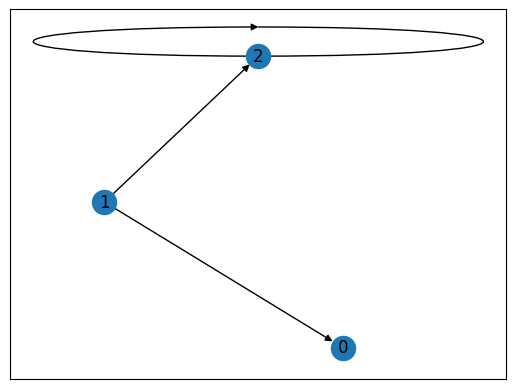

In [73]:
nx.draw_networkx(sub_h_1.to_networkx())

In [74]:
sub_h_2 = dgl.edge_subgraph(h, [1, 5, 4])
# or:
# sub_h_2.edge_subgraph([1, 5, 4])

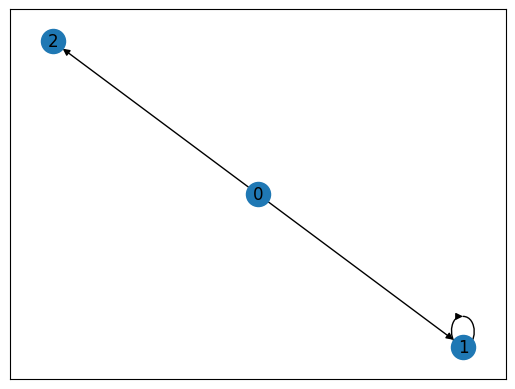

In [75]:
nx.draw_networkx(sub_h_2.to_networkx())

In [78]:
from dgl.subgraph import node_type_subgraph, edge_type_subgraph
sub_g_1 = node_type_subgraph(g, ['user'])

DGLError: ignored

In [79]:
# the same heterograph with an edge between two nodes of 'user' added:

data_dict = {
    ('user', 'watches', 'movie'): (torch.tensor([0, 0, 1, 2]),
                                   torch.tensor([0, 1, 0, 1])),
    ('director', 'directs', 'movie'): (torch.tensor([0, 1]),
                                       torch.tensor([1, 0])),
    ('user', 'intracts', 'user'): (torch.tensor([0, 1]),
                                       torch.tensor([1, 0]))
}
g = dgl.heterograph(data_dict)
g

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'intracts', 'user'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'user', 'intracts'), ('user', 'movie', 'watches')])

In [80]:
sub_g_1 = node_type_subgraph(g, ['user'])
# or:
# sub_g_1 = g.node_type_subgraph('user')

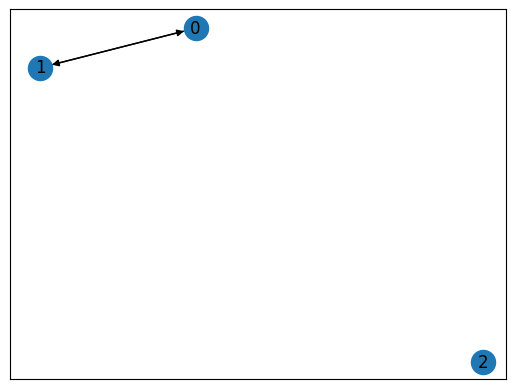

In [81]:
nx.draw_networkx(sub_g_1.to_networkx())

In [82]:
sub_g_2 = edge_type_subgraph(g, ['watches'])

In [83]:
sub_g_2

Graph(num_nodes={'movie': 2, 'user': 3},
      num_edges={('user', 'watches', 'movie'): 4},
      metagraph=[('user', 'movie', 'watches')])

In [84]:
h_sub_g = dgl.to_homogeneous(sub_g_2)

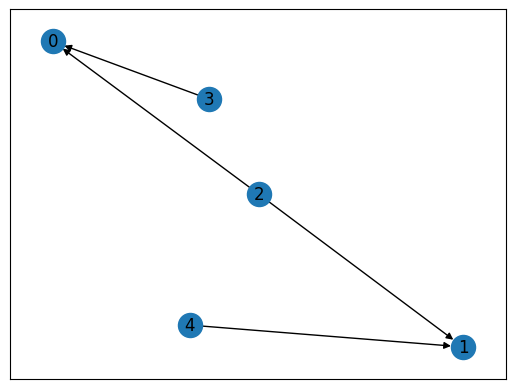

In [85]:
nx.draw_networkx(h_sub_g.to_networkx())

In [86]:
sub_h_3 = dgl.in_subgraph(h, [0, 1, 2])

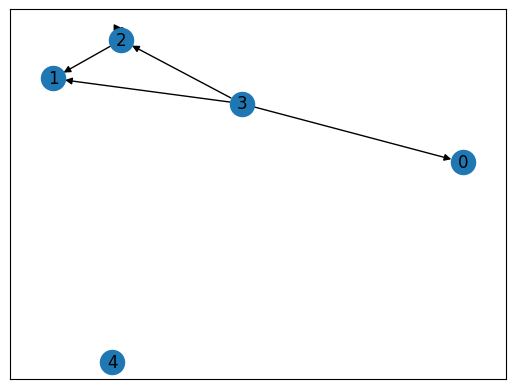

In [87]:
nx.draw_networkx(sub_h_3.to_networkx())

In [88]:
sub_h_4 = dgl.out_subgraph(h, [1, 2])

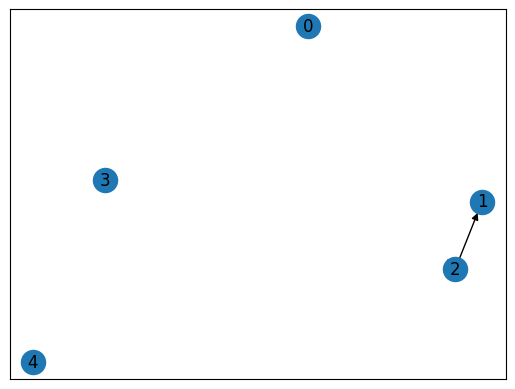

In [89]:
nx.draw_networkx(sub_h_4.to_networkx())

Let's draw h one more time:

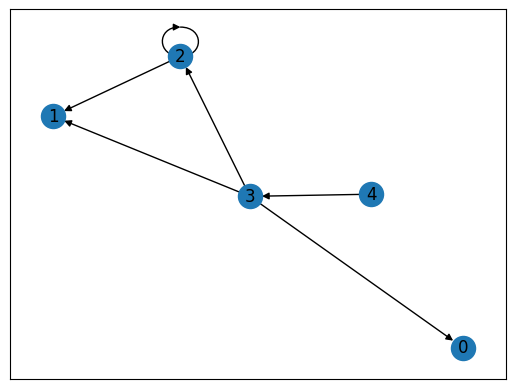

In [90]:
nx.draw_networkx(h.to_networkx(), with_labels = True)

In [91]:
sub_h_5 = dgl.khop_in_subgraph(h, [2, 3], 2)
sub_h_5

(Graph(num_nodes=3, num_edges=3,
       ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}),
 tensor([0, 1]))

In [92]:
sub_h_6 = dgl.khop_out_subgraph(h, [1, 3], 2)
sub_h_6

(Graph(num_nodes=4, num_edges=5,
       ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}),
 tensor([1, 3]))

In [93]:
g.__getitem__('watches')

Graph(num_nodes={'user': 3, 'movie': 2},
      num_edges={('user', 'watches', 'movie'): 4},
      metagraph=[('user', 'movie', 'watches')])

In [94]:
g.__getitem__('directs')

Graph(num_nodes={'director': 2, 'movie': 2},
      num_edges={('director', 'directs', 'movie'): 2},
      metagraph=[('director', 'movie', 'directs')])

In [95]:
g.__getitem__('intracts')

Graph(num_nodes=3, num_edges=2,
      ndata_schemes={}
      edata_schemes={})

In [96]:
lh = h.line_graph()
lh

Graph(num_nodes=6, num_edges=6,
      ndata_schemes={}
      edata_schemes={})

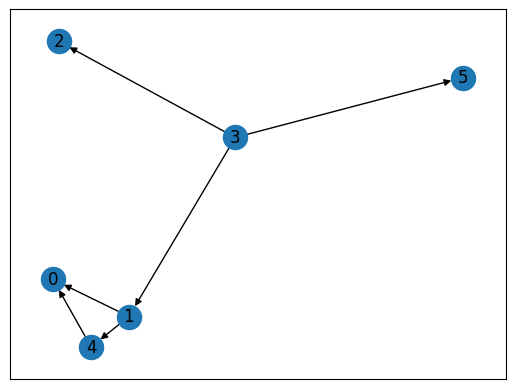

In [102]:
nx.draw_networkx(lh.to_networkx())

In [98]:
rh = h.reverse()
rh

Graph(num_nodes=5, num_edges=6,
      ndata_schemes={}
      edata_schemes={})

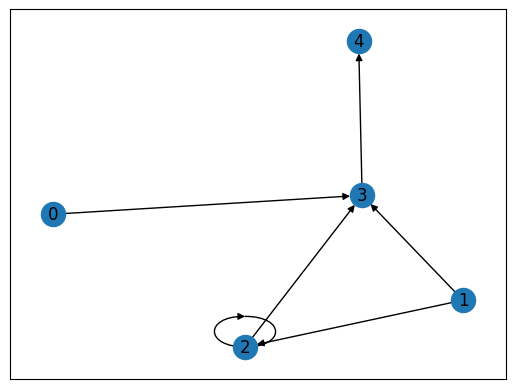

In [100]:
nx.draw_networkx(rh.to_networkx())

In [123]:
looped_g = g.add_self_loop(etype='intracts')

In [128]:
looped_g[('user', 'intracts', 'user')].edges('uv')

(tensor([0, 1, 0, 1, 2]), tensor([1, 0, 0, 1, 2]))

As we see above, 'user' nodes have self loops.

In [108]:
looped_h = h.add_self_loop()

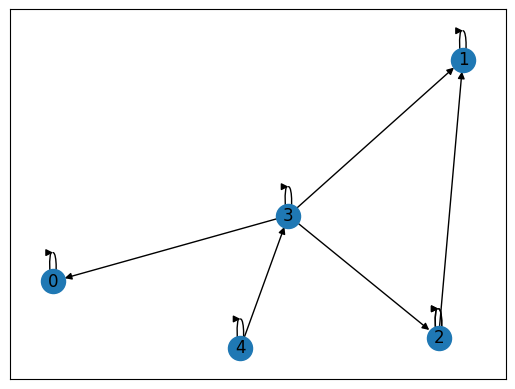

In [133]:
nx.draw_networkx(looped_h.to_networkx())

In [127]:
g = looped_g.remove_self_loop('intracts')

In [129]:
g[('user', 'intracts', 'user')].edges('uv')

(tensor([0, 1]), tensor([1, 0]))

In [131]:
h = looped_h.remove_self_loop()

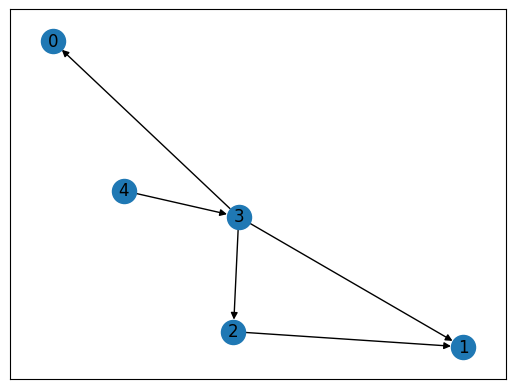

In [134]:
nx.draw_networkx(h.to_networkx())

In [136]:
simple_g = g.to_simple()
simple_g

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'intracts', 'user'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'user', 'intracts'), ('user', 'movie', 'watches')])

In [137]:
simple_h = h.to_simple()

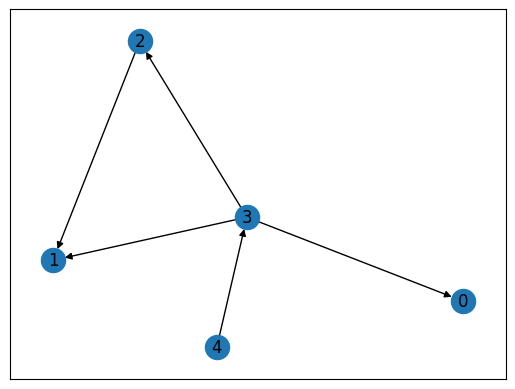

In [138]:
nx.draw_networkx(simple_h.to_networkx())

In [144]:
reordered_h = h.reorder_graph()

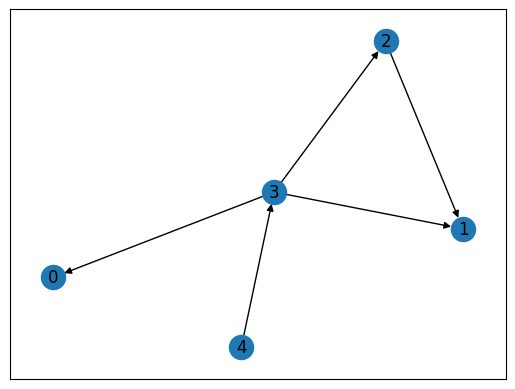

In [145]:
nx.draw_networkx(reordered_h.to_networkx())

In [146]:
from dgl.data.utils import save_graphs
save_graphs("./data.bin", [g, h])

In [148]:
from dgl.data.utils import load_graphs
graph_list = load_graphs("./data.bin")